Lets look at some data on Wine Reviews from Kaggle (https://www.kaggle.com/zynicide/wine-reviews). What I am most interested in is the relationship of the price of a bottle of wine relative to its review score.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
wine = pd.read_csv('winemag-data_first150k.csv')

In [35]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [36]:
wine['price'].mean()

33.13148249353299

In [37]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [38]:
wine[wine['province']=='California'].count()

Unnamed: 0     44508
country        44508
description    44508
designation    28805
points         44508
price          44356
province       44508
region_1       44508
region_2       44271
variety        44508
winery         44508
dtype: int64

In [39]:
wine['points'].mean()

87.8884184721394

In [40]:
wine.fillna(0)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,0,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,0,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,0,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,0,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,0,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [41]:
wine.fillna(0, inplace=True)

In [51]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,0,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,0,Provence red blend,Domaine de la Bégude


I want to now remove the 'Unnamed' column and set the indext to start at 1 instead of 0

In [52]:
del wine['Unnamed: 0']

In [53]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,0,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,0,Provence red blend,Domaine de la Bégude


In [54]:
wine.index = wine.index + 1

In [55]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,0,Tinta de Toro,Bodega Carmen Rodríguez
3,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
4,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
5,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,0,Provence red blend,Domaine de la Bégude


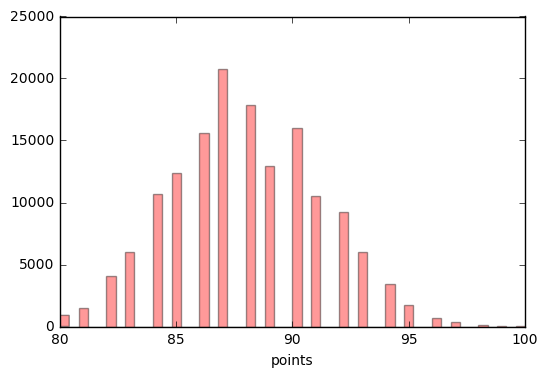

In [48]:
sns.distplot(wine['points'],kde=False,color='red')

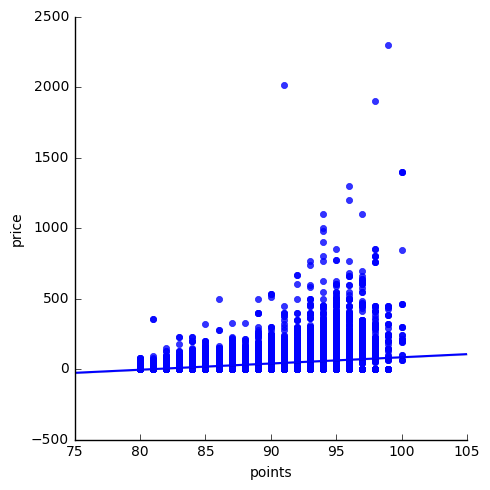

In [46]:
sns.lmplot(x='points',y='price',data=wine,palette='coolwarm')

Lets see if there is any correlation between review score and price.

In [56]:
wine.corr()

,points,price
points,1.000000,0.396582
price,0.396582,1.000000


In [58]:
by_province = wine.groupby('province')

In [71]:
by_province.mean().head()

,points,price
province,,
0,84.60000,18.400000
Achaia,83.50000,31.000000
Aconcagua Costa,89.20000,35.400000
Aconcagua Valley,87.28866,33.896907
Aegean,88.50000,32.812500


In [68]:
by_province.describe().transpose()['California']

points  count    44508.000000
        mean        87.682731
        std          3.535900
        min         80.000000
        25%         85.000000
        50%         87.000000
        75%         90.000000
        max        100.000000
price   count    44508.000000
        mean        35.384785
        std         27.406637
        min          0.000000
        25%         19.000000
        50%         30.000000
        75%         45.000000
        max       2013.000000
Name: California, dtype: float64

In [69]:
by_province.describe().transpose()['Washington']

points  count    9750.000000
        mean       88.879692
        std         2.860304
        min        80.000000
        25%        87.000000
        50%        89.000000
        75%        91.000000
        max        99.000000
price   count    9750.000000
        mean       29.194154
        std        16.461711
        min         0.000000
        25%        18.000000
        50%        26.000000
        75%        35.000000
        max       150.000000
Name: Washington, dtype: float64

As we can see when we look at California, a land of many wineries, we can see the average review points is around 87 and the average price is roughly $35.

Lets find out how many Sauvignon Blancs there are by implementing a function and a lambda expression.

In [74]:
def saubla(category):
    if 'Sauvignon Blanc' in category:
        return True
    else:
        return False

In [75]:
sum(wine['variety'].apply(lambda x: saubla(x)))

6527

This has been a little exploritory data analysis and practice with some tool on the wine reviews data set. 